In [81]:
import pandas as pd
from scipy.stats import ttest_ind
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
!ls cleaned\ csv

abcs_popinc.csv
abcs_popincmhp_cleaner_cola.csv
abcs_popincmhp_cleaner.csv
abcs_popincmhp.csv
ab_hosts_refver.csv
census_income.csv
cs_defhosts_refver.csv
host_profile_manual_image_labelling_results.csv
unmatched_citystates.csv


In [21]:
df = pd.read_csv('cleaned csv/host_profile_manual_image_labelling_results.csv', usecols=[4,5,6], converters=)

In [22]:
df.head()

,Number of people / Max,House in / Max,Site(AB:1/CS:2)
0,1,1,1
1,1,0,2
2,1,0,1
3,1,1,2
4,1,0,1


In [23]:
df = df.reset_index()

In [24]:
df.head()

,index,Number of people / Max,House in / Max,Site(AB:1/CS:2)
0,0,1,1,1
1,1,1,0,2
2,2,1,0,1
3,3,1,1,2
4,4,1,0,1


In [25]:
df['abcs'] = df['index'].apply(lambda x: 1 if x%2==0 else 2)

In [85]:
df['house_in_int'] = df['House in / Max'].apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '-'

In [27]:
df.tail()

,index,Number of people / Max,House in / Max,Site(AB:1/CS:2),abcs
1995,1995,2,0,2,2
1996,1996,1,0,2,1
1997,1997,1,0,2,2
1998,1998,2,1,2,1
1999,1999,1,0,2,2


In [28]:
del df['Site(AB:1/CS:2)']

In [34]:
len(df)

2000

In [37]:
len(df)

2000

In [31]:
ab = df[df['abcs'] == 1].dropna()
cs = df[df['abcs'] == 2].dropna()

In [32]:
len(ab), len(cs)

(1000, 999)

In [39]:
ab.tail()

,index,Number of people / Max,House in / Max,abcs
1990,1990,3,0,1
1992,1992,1,1,1
1994,1994,1,0,1
1996,1996,1,0,1
1998,1998,2,1,1


In [40]:
cs.head()

,index,Number of people / Max,House in / Max,abcs
1,1,1,0,2
3,3,1,1,2
5,5,1,0,2
7,7,1,1,2
9,9,1,0,2


In [41]:
cs.tail()

,index,Number of people / Max,House in / Max,abcs
1991,1991,1,2,2
1993,1993,1,0,2
1995,1995,2,0,2
1997,1997,1,0,2
1999,1999,1,0,2


# Tests

+ average number of faces, site, t-test
+ number of no faces, site, t-test
+ number of multifaces, site, max
+ smiles per facs, site, t-test

In [42]:
ab['Number of people / Max'].mean(), cs['Number of people / Max'].mean()

(1.23, 1.2792792792792793)

Face occurence frequnecy

In [43]:
ab['nfaces'] = ab['Number of people / Max']
cs['nfaces'] = cs['Number of people / Max']

In [44]:
ab['anyfaces'] = ab['nfaces']!=0
cs['anyfaces'] = cs['nfaces']!=0

ab['multifaces'] = ab['nfaces']>1
cs['multifaces'] = cs['nfaces']>1

abhasface = ab[ab['anyfaces']==True]
cshasface = cs[cs['anyfaces']==True]

abhas1face = ab[ab['nfaces']==1]
cshas1face = cs[cs['nfaces']==1]

In [45]:
ab['nfaces'].mean(), cs['nfaces'].mean()

(1.23, 1.2792792792792793)

In [46]:
ttest_ind(ab['nfaces'], cs['nfaces'])

Ttest_indResult(statistic=-1.3901113983410152, pvalue=0.16464997197498374)

In [47]:
ab['multifaces'].mean(), cs['multifaces'].mean()

(0.216, 0.29329329329329329)

In [48]:
ttest_ind(ab['multifaces'], cs['multifaces'])

Ttest_indResult(statistic=-3.9799457699353593, pvalue=7.1394372951374686e-05)

In [49]:
ab['anyfaces'].mean(), cs['anyfaces'].mean()

(0.93400000000000005, 0.89989989989989994)

In [50]:
ttest_ind(ab['anyfaces'], cs['anyfaces'])

Ttest_indResult(statistic=2.766449532527564, pvalue=0.0057192339576639566)

### More question Houses:

+ how many '2' professional background photos
+ how many '01' no person, just a house

In [72]:
ab['nohouse'] = ab['House in / Max'] == '0'
cs['nohouse'] = cs['House in / Max'] == '0'

ab['house'] = ab['House in / Max'] == '1'
cs['house'] = cs['House in / Max'] == '1'

ab['professional'] = ab['House in / Max'] == '2'
cs['professional'] = cs['House in / Max'] == '2'

In [73]:
ab['nohouse'].mean(), cs['nohouse'].mean()

(0.75600000000000001, 0.67467467467467468)

In [74]:
ttest_ind(ab['nohouse'], cs['nohouse'])

Ttest_indResult(statistic=4.0433740498966619, pvalue=5.4688339799327479e-05)

In [75]:
ab['house'].mean(), cs['house'].mean()

(0.20799999999999999, 0.23023023023023023)

In [76]:
ttest_ind(ab['house'], cs['house'])

Ttest_indResult(statistic=-1.2012518828916603, pvalue=0.22979595750041051)

In [77]:
ab['professional'].mean(), cs['professional'].mean()

(0.035999999999999997, 0.094094094094094097)

In [78]:
ttest_ind(ab['professional'], cs['professional'])

Ttest_indResult(statistic=-5.3010482502831451, pvalue=1.2786499804714729e-07)

# Graphs

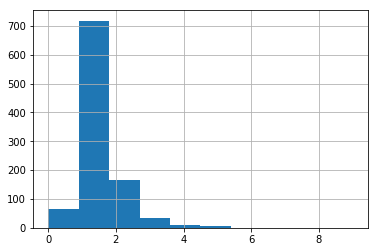

In [82]:
ab['nfaces'].hist()

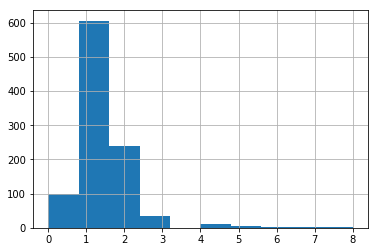

In [83]:
cs['nfaces'].hist()

TypeError: unorderable types: str() < float()

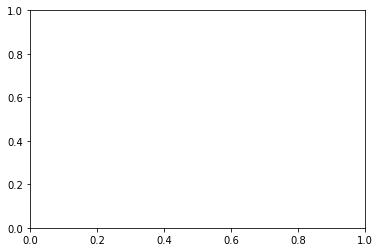

In [84]:
ab['House in / Max'].hist()